# LLMs

In [128]:
from langchain_openai import AzureChatOpenAI
import os
from dotenv import load_dotenv
load_dotenv()
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")

AZURE_DEPLOYMENT_GPT41 = os.getenv("AZURE_DEPLOYMENT_GPT41")
AZURE_DEPLOYMENT_GPT41_NANO = os.getenv("AZURE_DEPLOYMENT_GPT41_NANO")

gpt41_nano = AzureChatOpenAI(
    azure_deployment=AZURE_DEPLOYMENT_GPT41_NANO,
    api_version=AZURE_OPENAI_API_VERSION,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_key=AZURE_OPENAI_API_KEY,
    temperature=0.0
)

In [129]:
from langchain_ollama import OllamaLLM
llama32 = OllamaLLM(model="llama3.2:3b", temperature=0)

In [130]:
from dotenv import load_dotenv
load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq

groqllm = ChatGroq(
    model="llama-3.1-8b-instant",
    api_key=GROQ_API_KEY,
    temperature=0
)

# Ontology Classes, relations and attributes

In [4]:
from rdflib import Graph, RDF, OWL

def extract_local_names(ttl_file_path):
    """
    Extract ontology elements (local names without full URIs).
    Returns:
        - class_names: ontology classes (entities)
        - object_property_names: ontology object properties (relationships)
        - datatype_property_names: ontology datatype properties (attributes)
    """
    g = Graph()
    g.parse(ttl_file_path, format="turtle")
    
    def get_local_name(uri):
        uri_str = str(uri)
        if '#' in uri_str: 
            return uri_str.split('#')[-1]
        return uri_str.split('/')[-1]
    
    # Classes
    class_uris = [s for s, _, _ in g.triples((None, RDF.type, OWL.Class))]
    class_names = [get_local_name(uri) for uri in class_uris]
    
    # Object properties
    object_prop_uris = [s for s, _, _ in g.triples((None, RDF.type, OWL.ObjectProperty))]
    object_property_names = [get_local_name(uri) for uri in object_prop_uris]
    
    # Datatype properties
    data_prop_uris = [s for s, _, _ in g.triples((None, RDF.type, OWL.DatatypeProperty))]
    datatype_property_names = [get_local_name(uri) for uri in data_prop_uris]
    
    return (
        sorted(class_names),
        sorted(object_property_names),
        sorted(datatype_property_names),
    )

# Usage
classes, relations, attributes = extract_local_names('output/ontologies/RDB/rigor_ontology.ttl')

print(f"Found {len(classes)} classes, {len(relations)} object properties, {len(attributes)} datatype properties")
print("\nClass names:", classes)
print("\nObject properties (relations):", relations)
print("\nDatatype properties (attributes):", attributes)

Found 43 classes, 55 object properties, 126 datatype properties

Class names: ['Company', 'Criterion', 'GeographicCriterion', 'Grant', 'GrantPayment', 'GrantShare', 'GranterApplication', 'GranterApplicationFile', 'GranterCompany', 'GranterCompanyFile', 'GranterGeneralOpportunityFile', 'GranterOpportunity', 'GranterOpportunityFile', 'GranterPartner', 'OrganisationalCriterion', 'RelatedTable', 'agency_identifier', 'career_purpose_criterion', 'criterion', 'criterion_description', 'funding_scheme_criteria', 'granterCompany', 'granterCompanyMemory', 'granterConsortium', 'granterPartnerType', 'granter_applicationfile', 'granter_applications', 'granter_company', 'granter_companyfile', 'granter_companymemory', 'granter_consortium', 'granter_consortium_part_type', 'granter_eligibilitycriteria', 'granter_generalopportunityfile', 'granter_generalopportunityfile_opportunities', 'granter_matchcheck', 'granter_matchgroup', 'granter_opportunity', 'granter_opportunityfiles', 'granter_profile', 'grante

# Input text

In [88]:
from langchain_core.documents import Document
import os

input_txt_folder = "data/texts"

# Import opportunity file 
for filename in os.listdir(input_txt_folder):
    if filename.endswith('opportunity_example_eng.txt'):
        file_path = os.path.join(input_txt_folder, filename)
        print(f"Processing {filename}...")

        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                print(type(content))
        except Exception as e:
            print(f"Error processing {filename}: {e}")

document = Document(page_content=content)
print(document)

Processing opportunity_example_eng.txt...
<class 'str'>
page_content='European Funds closer to you.  
           
 
          1/23
Call for applications  
Call code   MAR2030 -2023 -22 
Date of publication  14/11/2023  
Nature of the notice   Tender  
Scope of action:  Operations  
Approved by SRMAR on 25/07/2023  
 
 
Name of the  notice  
Processing  of Fishery and Aquaculture Products in the Field of Productive Investments -  Autonomous Region 
of Madeira  
 
Support to  
promote the marketing, quality, and added value of fishery and aquaculture products, as well as 
the processing of these products . 
Actions covered by this notice  
This notice covers actions promoted by companies, as provided for in Article 50 of Ordinance No. 
559/2023 of July 25, relating to: 
a) Productive investments as well as investments that promote decarbonization, the use of renewable energy 
and energy efficiency, the circular economy, digitization, and internationalization,  
b) Investments that promot

# Chunk text

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def chunk_document(document, chunk_size=3000, chunk_overlap=50):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )
    return text_splitter.split_documents([document])

chunks = chunk_document(document)
print(chunks[1].page_content)

project, which specifies the scope of cooperation between the entities involved, the identification of the 
lead entity, the joint responsibility between the parties, the individual contribution of each entity to the 
implementation of the project, as well as the terms of sharing costs, risks, and results;  
iv) in which all entities participating in the project are considered beneficiaries and must therefore 
comply with all eligibility requirements, obligations, and impediments of beneficiaries;  
and 
v) payments are made to all co-promoters, who are individually responsible 
for the repayment of the support they have received and jointly responsible for the pursuit of the 
project's objectives, as well as for the achievement of the results . 
 
Entities that can apply  
SMEs whose activity falls within the CAE subclasses 
provided for in Article 52(1) of Ordinance No. 559/2023 of July 25 may benefit from the support provided for in this notice: 
a) 10201 “Preparation of fishery and

# Prompt

In [7]:
examples = [
    {'sentence': '<id> The technology company submitted their grant application for AI research projects.', 
    'answer': 'hasAgent(submitted,technology company)\nappliesFor(technology company,grant application)'},

    {'sentence': '<id> The granter opportunity requires applicants to meet the organisational criterion of having at least 50 employees.', 
    'answer': 'requires(granter opportunity,organisational criterion)\nhasEligibility(applicants,organisational criterion)'},

    {'sentence': '<id> The healthcare company applied for a grant that offers payments of up to $500,000.', 
    'answer': 'appliesFor(healthcare company,grant)\noffers(grant,grant payment)'},

    {'sentence': '<id> The environmental grant has a deadline of September 30 for all project submissions.', 
    'answer': 'hasDeadline(environmental grant,September 30)\nrequires(environmental grant,project submissions)'},

    {'sentence': '<id> The granter application file was evaluated by an AI review state before final approval.', 
    'answer': 'hasEvaluates(AI review state,granter application file)\naiReviewState(granter application file,AI review state)'},
]

In [89]:
#test_sentence = ' '.join([chunks[i].page_content for i in range(5)]) # 4 chunks
test_sentence = document.page_content
print(test_sentence)

European Funds closer to you.  
           
 
          1/23
Call for applications  
Call code   MAR2030 -2023 -22 
Date of publication  14/11/2023  
Nature of the notice   Tender  
Scope of action:  Operations  
Approved by SRMAR on 25/07/2023  
 
 
Name of the  notice  
Processing  of Fishery and Aquaculture Products in the Field of Productive Investments -  Autonomous Region 
of Madeira  
 
Support to  
promote the marketing, quality, and added value of fishery and aquaculture products, as well as 
the processing of these products . 
Actions covered by this notice  
This notice covers actions promoted by companies, as provided for in Article 50 of Ordinance No. 
559/2023 of July 25, relating to: 
a) Productive investments as well as investments that promote decarbonization, the use of renewable energy 
and energy efficiency, the circular economy, digitization, and internationalization,  
b) Investments that promote entrepreneurship by supporting the creation and development of start

In [9]:
def generate_prompt(concepts, relations, attributes, examples, test_sentence):
    """
    Build an ontology-guided extraction prompt for LLMs.
    
    Args:
        concepts (list[str]): Ontology classes (entities).
        relations (list[str]): Ontology object properties (relationships).
        attributes (list[str]): Ontology datatype properties (attributes).
        examples (list[dict]): Few-shot examples with keys {"sentence": str, "answer": str}.
        test_sentence (str): The new sentence to extract triples from.
    
    Returns:
        str: The formatted LLM prompt.
    """
    # Format ontology context
    concepts_str = ", ".join(concepts)
    relations_str = ", ".join(relations)
    attributes_str = ", ".join(attributes)

    # Format examples
    examples_str = "\n\n".join([
        f"Example sentence: {ex['sentence']}\nExample answer: {ex['answer']}"
        for ex in examples
    ])
    
    # Build complete prompt
    return f"""You are an assistant that extracts structured triples from text according to a given ontology.
The ontology consists of three parts:

- Allowed Entities (classes): {concepts_str}
- Allowed Relationships (object properties): {relations_str}
- Allowed Attributes (datatype properties): {attributes_str}

For each input sentence, output triples in the following formats:
- Relationship triple: (subject_entity, relationship, object_entity)
- Attribute triple: (entity, attribute, literal_value)

Do not invent new entities, relations, or attributes outside of the ontology.
Only return triples in the specified format.

{examples_str}

Now extract triples for the following sentence:
Test sentence: {test_sentence}
Test answer:"""

print(generate_prompt(classes, relations, attributes, examples, test_sentence))

You are an assistant that extracts structured triples from text according to a given ontology.
The ontology consists of three parts:

- Allowed Entities (classes): Company, Criterion, GeographicCriterion, Grant, GrantPayment, GrantShare, GranterApplication, GranterApplicationFile, GranterCompany, GranterCompanyFile, GranterGeneralOpportunityFile, GranterOpportunity, GranterOpportunityFile, GranterPartner, OrganisationalCriterion, RelatedTable, agency_identifier, career_purpose_criterion, criterion, criterion_description, funding_scheme_criteria, granterCompany, granterCompanyMemory, granterConsortium, granterPartnerType, granter_applicationfile, granter_applications, granter_company, granter_companyfile, granter_companymemory, granter_consortium, granter_consortium_part_type, granter_eligibilitycriteria, granter_generalopportunityfile, granter_generalopportunityfile_opportunities, granter_matchcheck, granter_matchgroup, granter_opportunity, granter_opportunityfiles, granter_profile, gr

# Defining structured output

In [10]:
from typing import List, Dict
from pydantic import BaseModel, Field

# Schema for one edge (object property)
class Edge(BaseModel):
    subject: str
    relation: str  # Must be in object_properties list
    object: str

# Main structured output schema
class GraphExtraction(BaseModel):
    edges: List[Edge]  # Object-property edges
    attributes: Dict[str, Dict[str, str]]  # {entity: {attribute_name: value}}

In [117]:
graph_schema = GraphExtraction.model_json_schema()
graph_schema

{'$defs': {'Edge': {'properties': {'subject': {'title': 'Subject',
     'type': 'string'},
    'relation': {'title': 'Relation', 'type': 'string'},
    'object': {'title': 'Object', 'type': 'string'}},
   'required': ['subject', 'relation', 'object'],
   'title': 'Edge',
   'type': 'object'}},
 'properties': {'edges': {'items': {'$ref': '#/$defs/Edge'},
   'title': 'Edges',
   'type': 'array'},
  'attributes': {'additionalProperties': {'additionalProperties': {'type': 'string'},
    'type': 'object'},
   'title': 'Attributes',
   'type': 'object'}},
 'required': ['edges', 'attributes'],
 'title': 'GraphExtraction',
 'type': 'object'}

In [ ]:
graph_schema['$defs']['Edge'].pop('required')

In [123]:
structured_llm = groqllm.with_structured_output(method="json_mode", schema=GraphExtraction)

In [94]:
#structured_llm = groqllm.bind_tools([GraphExtraction])

In [125]:
def build_prompt(concepts, object_properties, datatype_properties, sentence, examples):
    concepts_str = ", ".join(concepts)
    relations_str = ", ".join(object_properties)
    attributes_str = ", ".join(datatype_properties)

    examples_str = "\n\n".join([
        f"Example sentence: {ex['sentence']}\nExample answer: {ex['answer']}"
        for ex in examples
    ])

    prompt = f"""
You are an assistant that extracts structured triples from text according to a given ontology.
Return the extracted triples in JSON format.

\nOntology rules:\n
Entities (classes): {concepts_str}
Relationships (object properties): {relations_str}
Attributes (datatype properties): {attributes_str}

Examples:
{examples_str}

\nSentence to extract:\n {sentence}
"""
    return prompt

In [126]:
prompt = build_prompt(classes, relations, attributes, test_sentence, examples)
print(prompt)


You are an assistant that extracts structured triples from text according to a given ontology.
Return the extracted triples in JSON format.


Ontology rules:

Entities (classes): Company, Criterion, GeographicCriterion, Grant, GrantPayment, GrantShare, GranterApplication, GranterApplicationFile, GranterCompany, GranterCompanyFile, GranterGeneralOpportunityFile, GranterOpportunity, GranterOpportunityFile, GranterPartner, OrganisationalCriterion, RelatedTable, agency_identifier, career_purpose_criterion, criterion, criterion_description, funding_scheme_criteria, granterCompany, granterCompanyMemory, granterConsortium, granterPartnerType, granter_applicationfile, granter_applications, granter_company, granter_companyfile, granter_companymemory, granter_consortium, granter_consortium_part_type, granter_eligibilitycriteria, granter_generalopportunityfile, granter_generalopportunityfile_opportunities, granter_matchcheck, granter_matchgroup, granter_opportunity, granter_opportunityfiles, gra

In [127]:
response = structured_llm.invoke(prompt)
response

OutputParserException: Failed to parse GraphExtraction from completion {"triples": [{"subject": "MAR2030 Program", "predicate": "hasAim", "object": "promote the marketing, quality, and added value of fishery and aquaculture products, as well as the processing of these products"}, {"subject": "MAR2030 Program", "predicate": "hasObjective", "object": "promote sustainable aquaculture activities and the processing and marketing of fishery and aquaculture products"}, {"subject": "MAR2030 Program", "predicate": "hasPriority", "object": "2 - Promote sustainable aquaculture activities and the processing and marketing of fishery and aquaculture products"}, {"subject": "MAR2030 Program", "predicate": "hasSpecificObjective", "object": "FSO2.2 - Promote the marketing, quality, and added value of fishery and aquaculture products, as well as the processing of these products"}, {"subject": "MAR2030 Program", "predicate": "hasTypeOfAction", "object": "FSO2.2 -01-Productive investments in processing"}, {"subject": "MAR2030 Program", "predicate": "hasTypeOfIntervention", "object": "FSO2.2.02 - Investments in energy efficiency, the circular economy, digitization, and internationalization"}, {"subject": "MAR2030 Program", "predicate": "hasTypeOfOperation", "object": "8503 - Investment in reducing energy consumption and energy efficiency"}, {"subject": "MAR2030 Program", "predicate": "hasFund", "object": "FEAMPA"}, {"subject": "MAR2030 Program", "predicate": "hasFundAllocation", "object": "\u20ac770,000"}, {"subject": "MAR2030 Program", "predicate": "hasMaximumRate", "object": "100%"}, {"subject": "MAR2030 Program", "predicate": "hasNationalAllocation", "object": "\u20ac330,000"}, {"subject": "MAR2030 Program", "predicate": "hasSourceOfFinancing", "object": "Investment budget"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Productive investments as well as investments that promote decarbonization, the use of renewable energies and energy efficiency, the circular economy, digitization, and internationalization"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Promotion of entrepreneurship through support for the creation and development of start-ups and spin-offs"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Investments in the certification and promotion of sustainable fisheries and aquaculture products"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Investments that reduce the impact of the activity on the environment"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Development of marketing and internationalization strategies"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Marketing innovation"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Initiatives that promote consumption diversification through the processing of fishery products"}, {"subject": "MAR2030 Program", "predicate": "hasEligibleAction", "object": "Promotion of short distribution and marketing channels"}, {"subject": "SMEs", "predicate": "canApply", "object": "MAR2030 Program"}, {"subject": "SMEs", "predicate": "hasActivity", "object": "Preparation of fishery and aquaculture products"}, {"subject": "SMEs", "predicate": "hasActivity", "object": "Freezing of fishery and aquaculture products"}, {"subject": "SMEs", "predicate": "hasActivity", "object": "Preservation of fishery and aquaculture products in olive oil and other vegetable oils and other sauces"}, {"subject": "SMEs", "predicate": "hasActivity", "object": "Salting, drying, and other processing of fishery and aquaculture products"}, {"subject": "SMEs", "predicate": "hasActivity", "object": "Production of crude animal oils and fats, if related to fishery and aquaculture products"}, {"subject": "SMEs", "predicate": "hasActivity", "object": "Manufacture of pre-cooked meals and dishes, if related to fishery and aquaculture products"}, {"subject": "Higher education institutions", "predicate": "canApply", "object": "MAR2030 Program"}, {"subject": "Higher education institutions", "predicate": "hasActivity", "object": "Preparation of fishery and aquaculture products"}, {"subject": "Higher education institutions", "predicate": "hasActivity", "object": "Freezing of fishery and aquaculture products"}, {"subject": "Higher education institutions", "predicate": "hasActivity", "object": "Preservation of fishery and aquaculture products in olive oil and other vegetable oils and other sauces"}, {"subject": "Higher education institutions", "predicate": "hasActivity", "object": "Salting, drying, and other processing of fishery and aquaculture products"}, {"subject": "Higher education institutions", "predicate": "hasActivity", "object": "Production of crude animal oils and fats, if related to fishery and aquaculture products"}, {"subject": "Higher education institutions", "predicate": "hasActivity", "object": "Manufacture of pre-cooked meals and dishes, if related to fishery and aquaculture products"}, {"subject": "State or international laboratories", "predicate": "canApply", "object": "MAR2030 Program"}, {"subject": "State or international laboratories", "predicate": "hasActivity", "object": "Preparation of fishery and aquaculture products"}, {"subject": "State or international laboratories", "predicate": "hasActivity", "object": "Freezing of fishery and aquaculture products"}, {"subject": "State or international laboratories", "predicate": "hasActivity", "object": "Preservation of fishery and aquaculture products in olive oil and other vegetable oils and other sauces"}, {"subject": "State or international laboratories", "predicate": "hasActivity", "object": "Salting, drying, and other processing of fishery and aquaculture products"}, {"subject": "State or international laboratories", "predicate": "hasActivity", "object": "Production of crude animal oils and fats, if related to fishery and aquaculture products"}, {"subject": "State or international laboratories", "predicate": "hasActivity", "object": "Manufacture of pre-cooked meals and dishes, if related to fishery and aquaculture products"}, {"subject": "Private non-profit institutions", "predicate": "canApply", "object": "MAR2030 Program"}, {"subject": "Private non-profit institutions", "predicate": "hasActivity", "object": "Preparation of fishery and aquaculture products"}, {"subject": "Private non-profit institutions", "predicate": "hasActivity", "object": "Freezing of fishery and aquaculture products"}, {"subject": "Private non-profit institutions", "predicate": "hasActivity", "object": "Preservation of fishery and aquaculture products in olive oil and other vegetable oils and other sauces"}, {"subject": "Private non-profit institutions", "predicate": "hasActivity", "object": "Salting, drying, and other processing of fishery and aquaculture products"}, {"subject": "Private non-profit institutions", "predicate": "hasActivity", "object": "Production of crude animal oils and fats, if related to fishery and aquaculture products"}, {"subject": "Private non-profit institutions", "predicate": "hasActivity", "object": "Manufacture of pre-cooked meals and dishes, if related to fishery and aquaculture products"}, {"subject": "Other public and private non-profit institutions", "predicate": "canApply", "object": "MAR2030 Program"}, {"subject": "Other public and private non-profit institutions", "predicate": "hasActivity", "object": "Preparation of fishery and aquaculture products"}, {"subject": "Other public and private non-profit institutions", "predicate": "hasActivity", "object": "Freezing of fishery and aquaculture products"}, {"subject": "Other public and private non-profit institutions", "predicate": "hasActivity", "object": "Preservation of fishery and aquaculture products in olive oil and other vegetable oils and other sauces"}, {"subject": "Other public and private non-profit institutions", "predicate": "hasActivity", "object": "Salting, drying, and other processing of fishery and aquaculture products"}, {"subject": "Other public and private non-profit institutions", "predicate": "hasActivity", "object": "Production of crude animal oils and fats, if related to fishery and aquaculture products"}, {"subject": "Other public and private non-profit institutions", "predicate": "hasActivity", "object": "Manufacture of pre-cooked meals and dishes, if related to fishery and aquaculture products"}, {"subject": "Autonomous Region of Madeira", "predicate": "hasGeographicalArea", "object": "MAR2030 Program"}, {"subject": "MAR2030 Program", "predicate": "hasApplicationPeriod", "object": "From 14/11/2023 to 30/12/2027"}, {"subject": "MAR2030 Program", "predicate": "hasIndicativeFundAllocation", "object": "\u20ac770,000"}, {"subject": "MAR2030 Program", "predicate": "hasMaximumCoFinancingRate", "object": "70%"}, {"subject": "MAR2030 Program", "predicate": "hasFundingProgram", "object": "MAR 2030 Program"}, {"subject": "MAR2030 Program", "predicate": "hasSupportManagementEntity", "object": "Regional Coordinator of Mar 2030 - Autonomous Region of Madeira"}, {"subject": "MAR2030 Program", "predicate": "hasContactForFurtherInformation", "object": "Funds Hotline 800 10 35 10"}, {"subject": "MAR2030 Program", "predicate": "hasContactForFurtherInformation", "object": "Email: linhadosfundos@linhadosfundos.pt"}, {"subject": "MAR2030 Program", "predicate": "hasContactForFurtherInformation", "object": "Phone: +351 291 203 250"}, {"subject": "MAR2030 Program", "predicate": "hasContactForFurtherInformation", "object": "Email: drp@madeira.gov.pt"}]}. Got: 2 validation errors for GraphExtraction
edges
  Field required [type=missing, input_value={'triples': [{'subject': ...: drp@madeira.gov.pt'}]}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
attributes
  Field required [type=missing, input_value={'triples': [{'subject': ...: drp@madeira.gov.pt'}]}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [86]:
print(response.content)

<function=GraphExtraction>{"edges":[{"subject":"Os Fundos Europeus mais próximos de si","relation":"appliesFor","object":"grant"},{"subject":"grant","relation":"offers","object":"grant payment"},{"subject":"grant payment","relation":"hasAmount","object":"770 000 €"},{"subject":"grant payment","relation":"hasCurrency","object":"€"},{"subject":"grant payment","relation":"hasPercentage","object":"70 %"},{"subject":"grant payment","relation":"hasProgram","object":"Programa MAR 2030"},{"subject":"grant payment","relation":"hasEntity","object":"Coordenador Regional do Mar 2030 - Região Autónoma da Madeira"},{"subject":"grant payment","relation":"hasFundingScheme","object":"Fundo e Taxa máxima de cofinanciamento"},{"subject":"grant payment","relation":"hasDeadline","object":"30/12/2027"},{"subject":"grant payment","relation":"hasArea","object":"Região Autónoma da Madeira"},{"subject":"grant payment","relation":"hasProgram","object":"Programa MAR 2030"},{"subject":"grant payment","relation":"h

In [87]:
response.tool_calls

[]

In [53]:
graph_data = response.tool_calls[0]["args"]

# Storing the graph

## Creating networkx instance

In [54]:
import networkx as nx

# Create a directed multigraph (can hold multiple edges between same nodes)
G = nx.MultiDiGraph()

# Add edges
for edge in graph_data["edges"]:
    subj, rel, obj = edge["subject"], edge["relation"], edge["object"]
    G.add_edge(subj, obj, relation=rel)

# Add attributes if you have them
for node, attrs in graph_data["attributes"].items():
    if node in G.nodes:
        G.nodes[node].update(attrs)

## Visualizing it

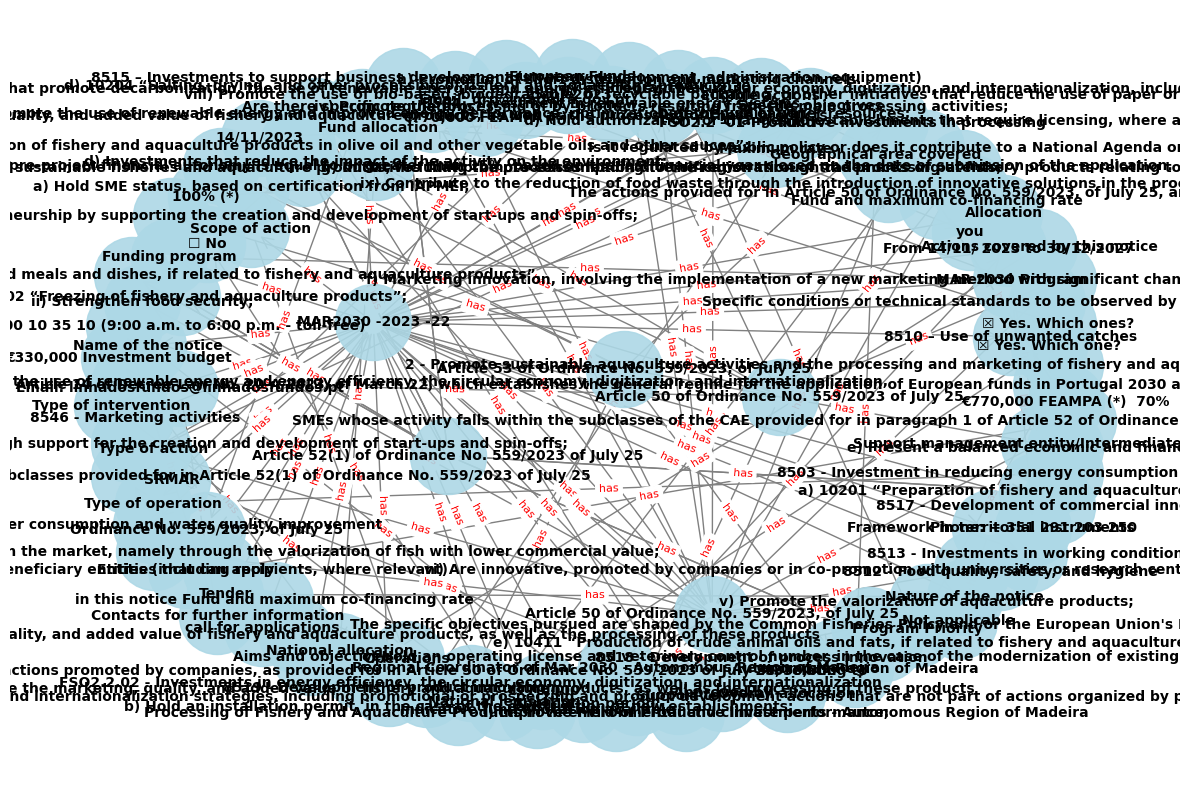

In [55]:
import matplotlib.pyplot as plt

def visualize_graph(G: nx.MultiDiGraph, figsize=(12, 8)):
    """
    Visualize a NetworkX MultiDiGraph with relation labels on edges.
    """
    plt.figure(figsize=figsize)
    
    # Create layout for better visualization
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                          node_color='lightblue', 
                          node_size=3000,
                          alpha=0.9)
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos, 
                           font_size=10, 
                           font_weight='bold')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, 
                          edge_color='gray', 
                          arrows=True, 
                          arrowsize=20,
                          arrowstyle='->')
    
    # Draw edge labels (relations)
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        relation = data.get('relation', 'relatedTo')
        edge_labels[(u, v)] = relation
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels, 
                                font_size=8, 
                                font_color='red')
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize your graph
visualize_graph(G)

## Converting to csv-like format (for later implementation of G-retriever)

In [ ]:
def graph_to_text(G: nx.MultiDiGraph):
    lines = []
    # Node descriptions (with attributes if any)
    for node, attrs in G.nodes(data=True):
        if attrs:
            attr_str = ", ".join(f"{k}={v}" for k, v in attrs.items())
            lines.append(f"Node: {node} | Attributes: {attr_str}")
        else:
            lines.append(f"Node: {node}")

    # Edge descriptions
    for u, v, data in G.edges(data=True):
        relation = data.get("relation", "relatedTo")
        lines.append(f"Edge: {u} --{relation}--> {v}")

    return "\n".join(lines)

context_text = graph_to_text(G)
print(context_text)

Node: processes leading to the registration of trademarks or patents
Node: registration of trademarks or patents
Node: investments that reduce the impact of the activity on the environment
Node: environmental impact reduction
Node: development of marketing and internationalization strategies
Node: marketing and internationalization strategies
Node: marketing innovation
Node: initiatives that promote consumption diversification
Node: consumption diversification
Node: promotion of short distribution and marketing circuits
Node: short distribution and marketing circuits
Node: projects in co-promotion innovation
Node: co-promotion innovation
Node: projects developed between two or more independent entities
Node: independent entities cooperation
Node: cooperation in the medium and long term
Node: long term cooperation
Node: sharing infrastructure
Node: infrastructure sharing
Node: sharing skills
Node: skills sharing
Node: sharing resources
Node: resources sharing
Node: projects led by a com

## Saving it to csv

In [56]:
import pandas as pd

def save_graph_as_csv(graph_data, filename="graph.csv"):
    edges = graph_data["edges"]
    df = pd.DataFrame(edges)  # subject, relation, object
    df.to_csv(filename, index=False)

save_graph_as_csv(graph_data, "graph.csv")